In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

In [3]:
file_path = "online_retail.csv"  # Update the path if needed
online_retail_data = pd.read_csv(file_path, encoding="ISO-8859-1")
print(online_retail_data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       0

In [4]:
high_orders = online_retail_data.groupby('InvoiceNo')['Quantity'].sum()
high_order_days = (high_orders > 50).sum()


In [5]:
total_orders = high_orders.count()

In [6]:
print(total_orders)

25900


In [7]:
p_high_order = high_order_days / total_orders

In [8]:
n_trials = total_orders  
p = p_high_order 

In [9]:
x_values = range(0, n_trials + 1)
binom_prob = binom.pmf(x_values, n_trials, p)

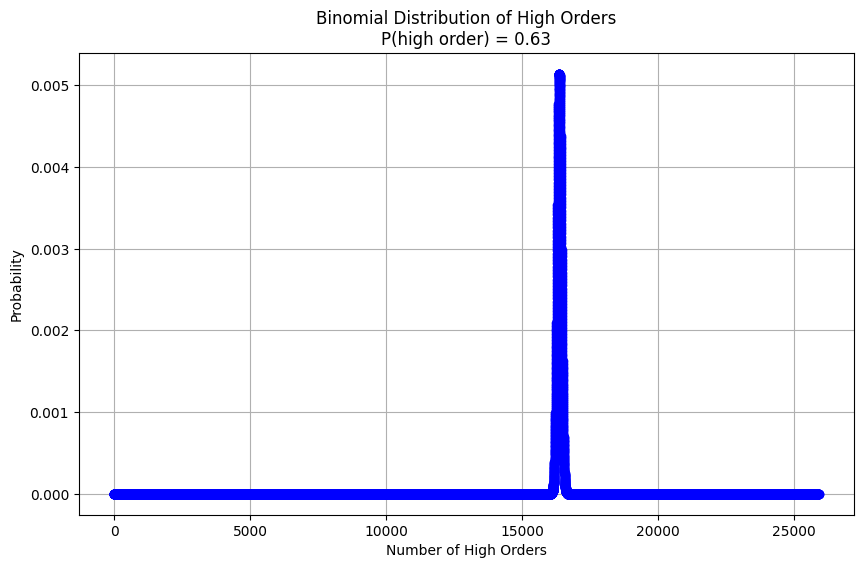

P(high order) = 0.63
Number of high orders: 16370
Total number of orders: 25900


In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, binom_prob, marker='o', linestyle='--', color='blue')
plt.title(f"Binomial Distribution of High Orders\nP(high order) = {p_high_order:.2f}")
plt.xlabel("Number of High Orders")
plt.ylabel("Probability")
plt.grid(True)
plt.show()
print(f"P(high order) = {p_high_order:.2f}")
print(f"Number of high orders: {high_order_days}")
print(f"Total number of orders: {total_orders}")